# Data Science – Parkinson's Disease Classification
https://fenix.tecnico.ulisboa.pt/disciplinas/CDadosi7/2019-2020/1-semestre

---

The students should perform a statistical analysis of the datasets in advance and summarize relevant implications in the report, such as the underlying distributions and hypothesized forms feature dependency.
## Preprocessing
In accordance with the properties of the input dataset and the behavior of the target learning algorithm, the
students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its potential
impact on learning.

## Data Set Information
The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

## Attribute Information
Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

---
---

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
# Read the dataset and skip the first row
df = pd.read_csv("dataset/pd_speech_features.csv", skiprows=1)

## 1. Statistical description (5%)

In [4]:
# The dataset consists of 755 columns
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [5]:
# Describe the dataset
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


#### How many participants are in the dataframe?

In [7]:
print("There are", len(df.groupby(df.id).first().gender), "unique participant ids in the dataset.")

There are 252 unique participant ids in the dataset.


#### Are all of the records of each participant already classified?
Or is there anybody who was had no Parkinsons but then turned out to be positive?

In [8]:
# There are no people who were diagnosed with alzheimer after the measurements were started
df.groupby([df["id"]])["class"].mean().isin([0, 1]).value_counts()

True    252
Name: class, dtype: int64

#### Are there any missing values?

In [9]:
print("There are %d NA and %d null values." % (df[df.isna().any(axis=1)].__len__(), 
                                               df[df.isnull().any(axis=1)].__len__()))

There are 0 NA and 0 null values.


#### Gender vs target variable

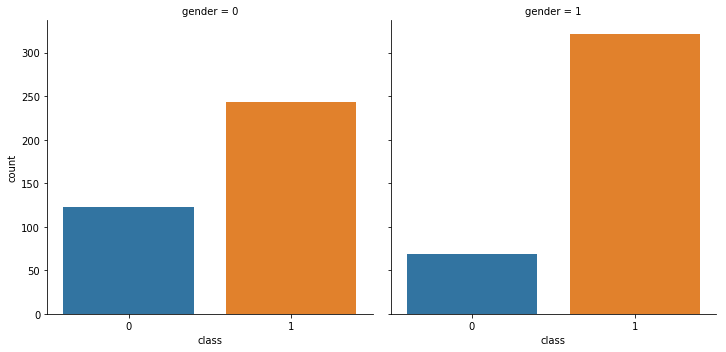

In [10]:
import seaborn as sns

# How does the parkinsons disease depend on the gender?
plot = sns.catplot(x="class", col="gender", data=df, kind="count")

#### Target variable

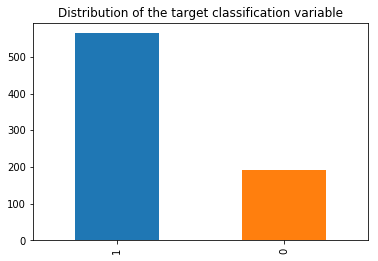

In [11]:
fig, ax = plt.subplots()
fig = df["class"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Distribution of the target classification variable")
plt.show()

In [12]:
columns_start = 1
columns_end = 21

def choose_grid(nr):
    # // 4 + 1
    return nr // 4, 4 

<Figure size 432x288 with 0 Axes>

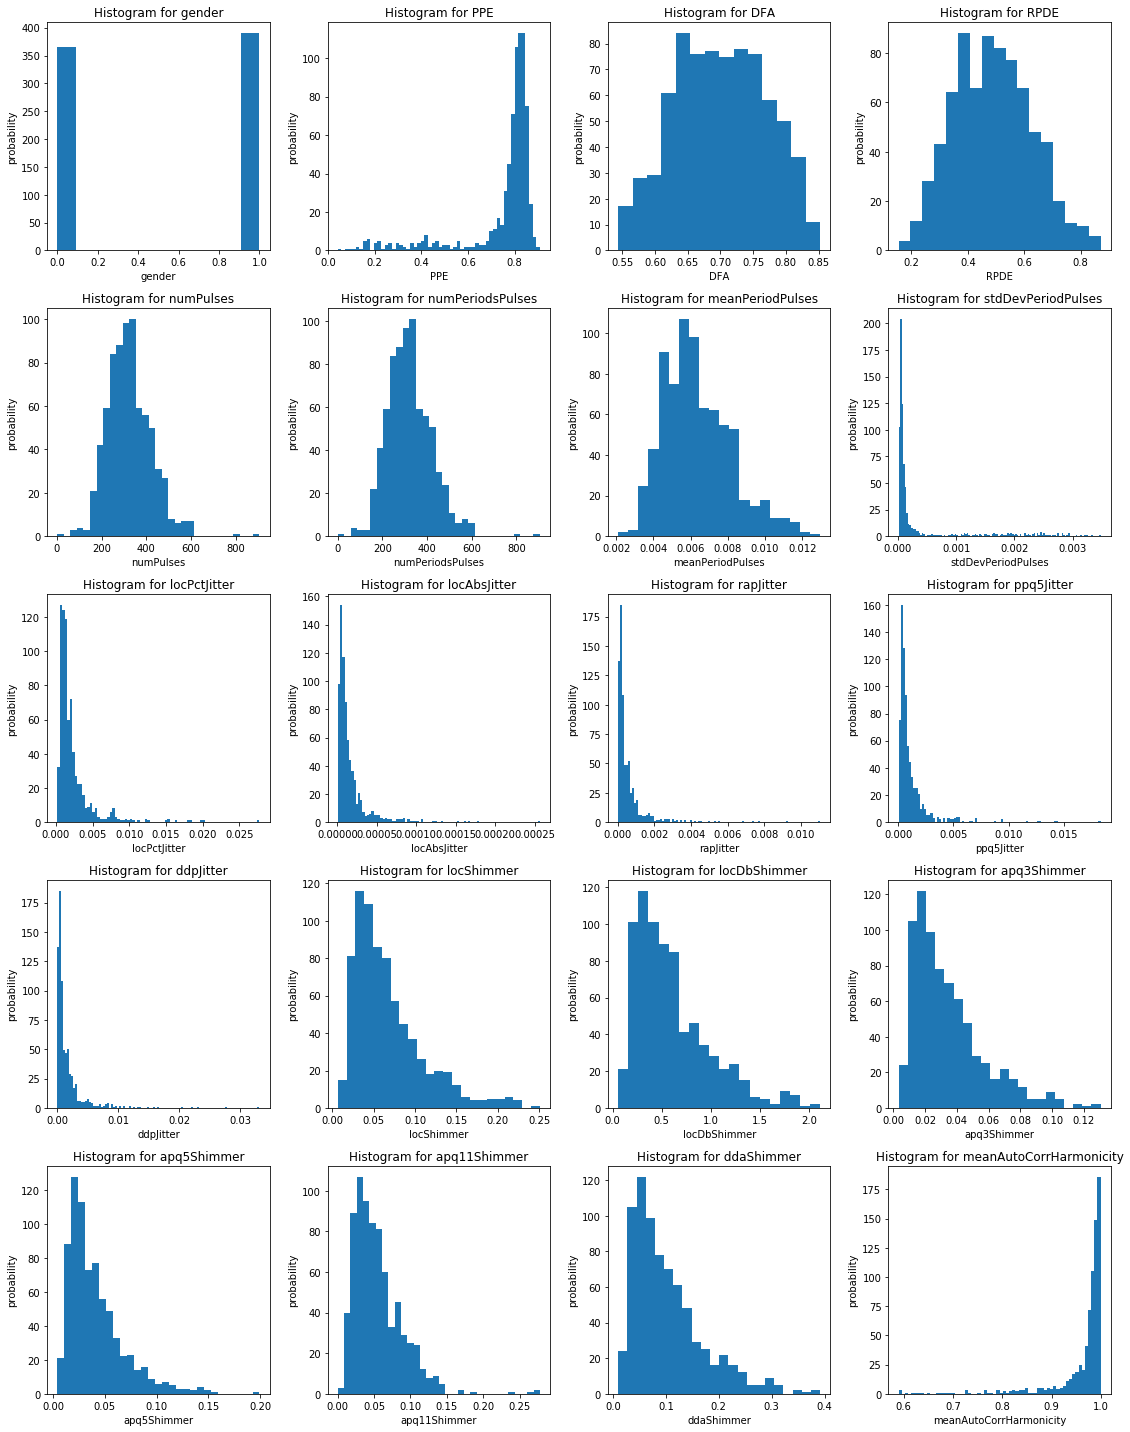

In [13]:
columns = df.iloc[:,columns_start:columns_end].select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("probability")
    axs[i, j].hist(df.iloc[:,columns_start:columns_end][columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

#### Correlation matrix
The number of paramaters is really high

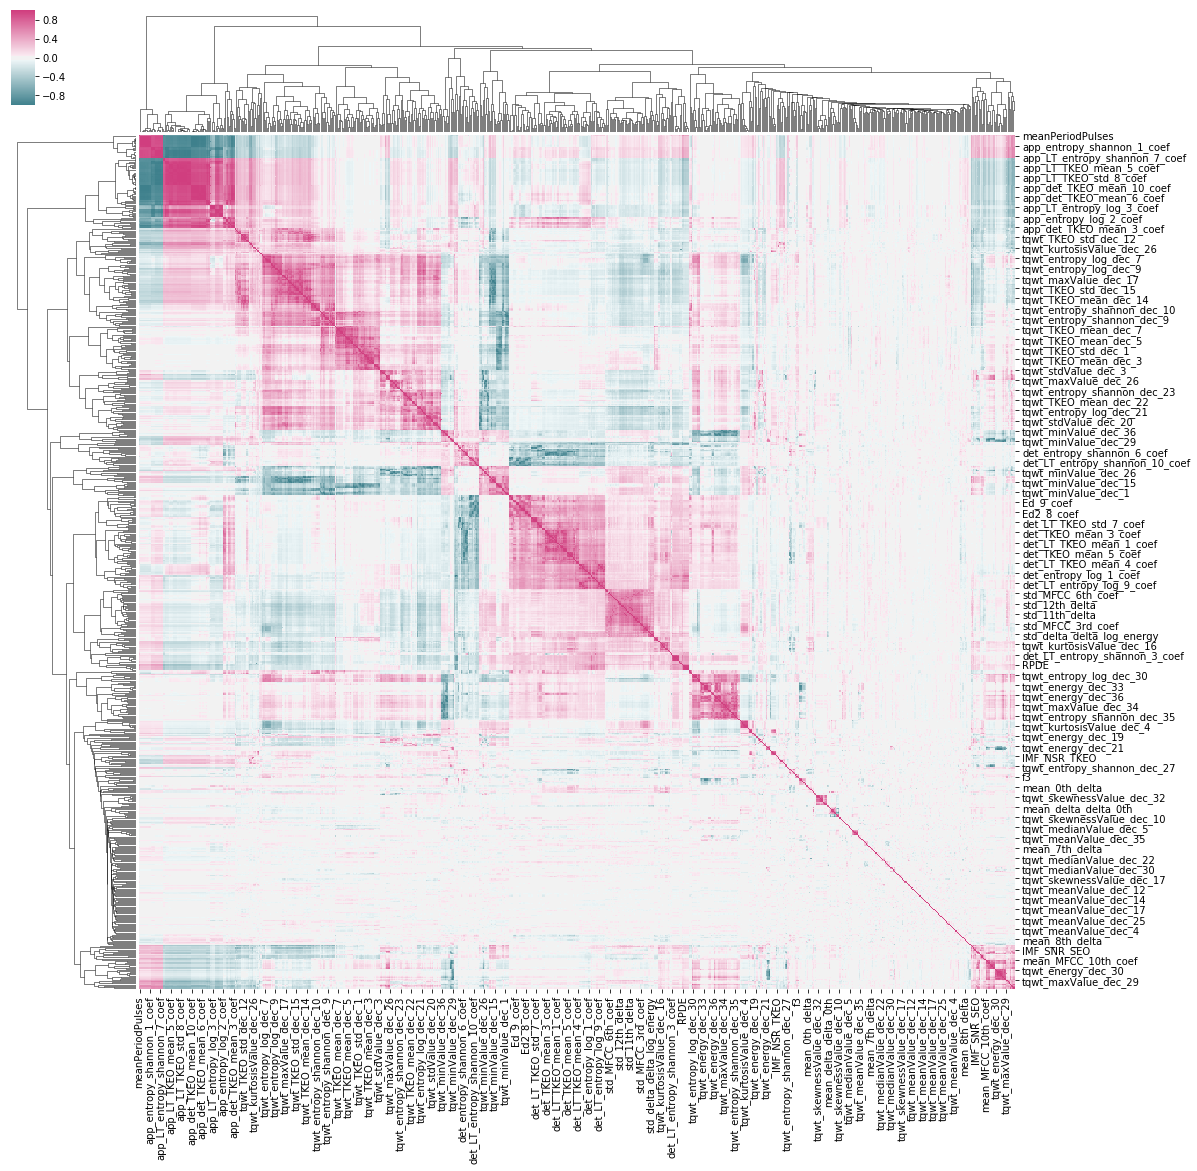

In [15]:
cmap = sns.diverging_palette(h_neg=210, h_pos=350, as_cmap=True)
sns.clustermap(df.corr(), figsize=(18, 18), cmap=cmap);

#### Correlation of attributes with the target variable

In [21]:
# Calculate the correlation of each attribute
corcolumns = df.drop(columns=["class"]).corrwith(df["class"])
corcolumns = pd.DataFrame(corcolumns, columns=["correlation"])
corcolumns["abs_correlation"] = abs(corcolumns.correlation)

# Sort the most correlated values
corcolumns = corcolumns.sort_values(by="abs_correlation", ascending=False)

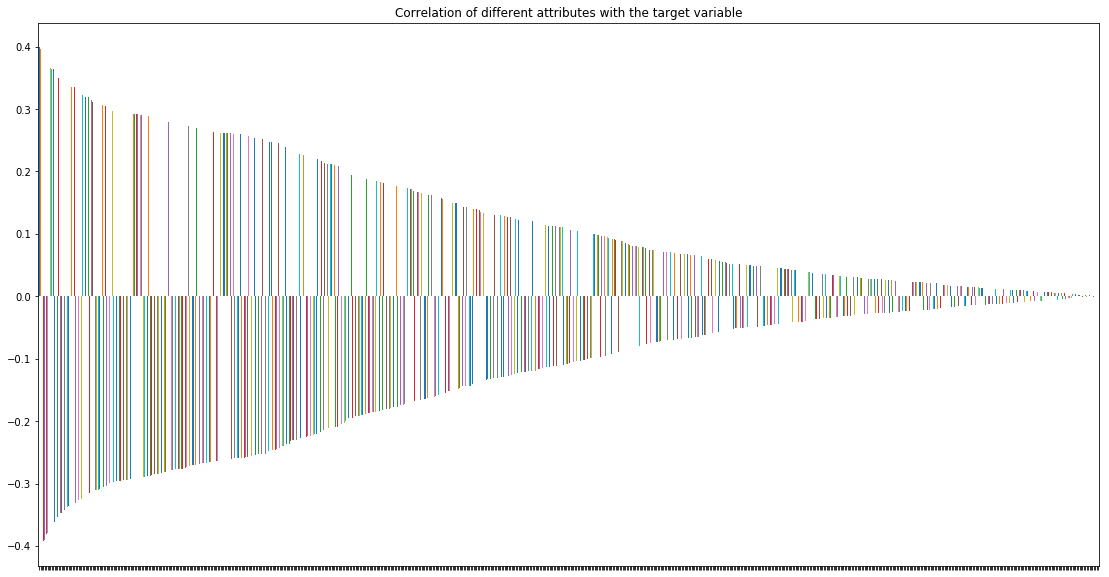

In [22]:
fig, ax = plt.subplots(figsize=(19, 10))
corcolumns.correlation.plot(kind="bar", title="Correlation of different attributes with the target variable", ax=ax)
ax.set_xticklabels([])
plt.show()

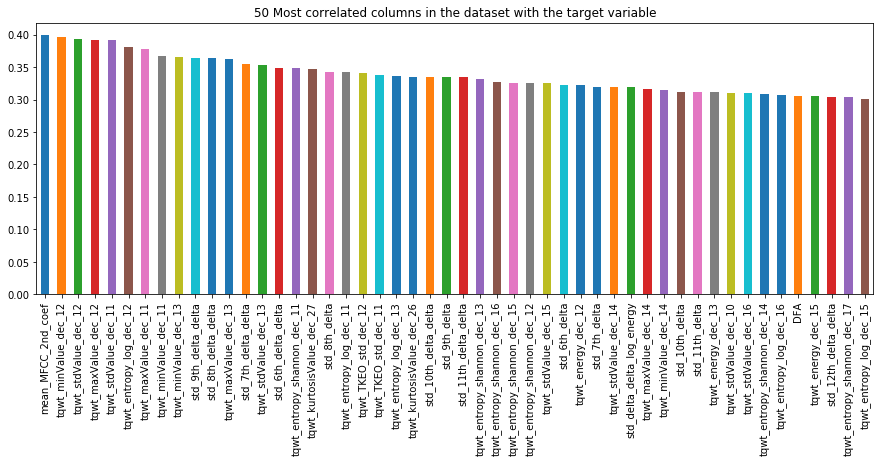

In [32]:
plt.figure(figsize=(15, 5))
corcolumns.abs_correlation.iloc[:50].plot(kind="bar", title="50 Most correlated columns in the dataset with the target variable")
plt.show()

## Preprocessing (20%)
- Average the data samples?
- Create 3 different datasets by each patient?

**Tips from the lab:**
- subsampling
    - select only some of the data
- oversampling
    - suplicate some data
    - works for some algorithms
- SMOTE
    - looks for similiar variables

Tip for the second dataset:
> We should do subsampling on the second dataset. Some classes are really unbalanced?

Columns which should not be used for learning: ID

### Train / Test / Validation

- Stratified validation?
- Should preprocessing be done inside cross validation?

Data will be split 65% train, 20% test, 15% validation. Cross validation is used instead of the train/test array.

In [87]:
train_size, test_size, valid_size = (0.65, 0.20, 0.15)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=["class"])
y = df["class"]

X_merge, X_valid, y_merge, y_valid = train_test_split(X, y, test_size=valid_size, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_merge, y_merge, test_size=test_size/train_size, random_state=42)

## Unsupervised (15%)
- Association Rules (7.5%)
- Clustering (7.5%)

### Association Rules (7.5%)

### Clustering (7.5%)

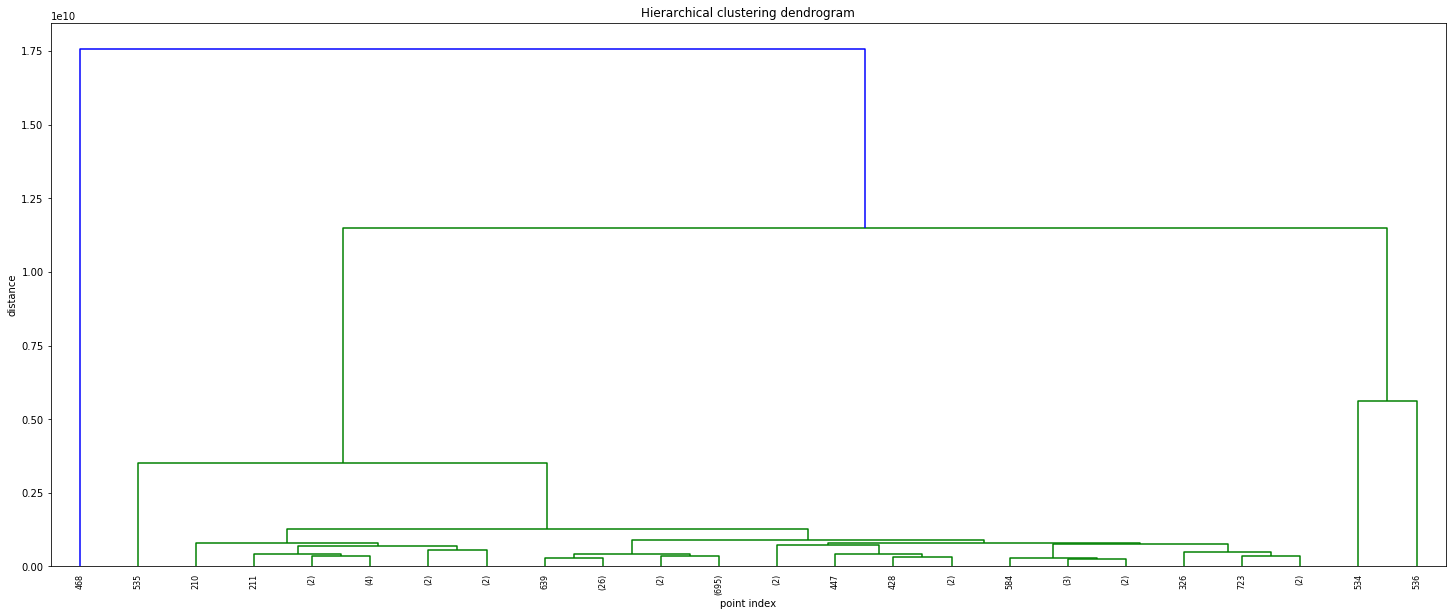

In [26]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

def dendrogram_plot(data):
    linkageMatrix = linkage(data.drop(columns=["id"]), "single")

    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical clustering dendrogram')
    plt.xlabel('point index')
    plt.ylabel('distance')
    dendrogram(linkageMatrix, truncate_mode='lastp', p=24,
        leaf_rotation=90., leaf_font_size=8.)
    plt.show()
    
dendrogram_plot(df)

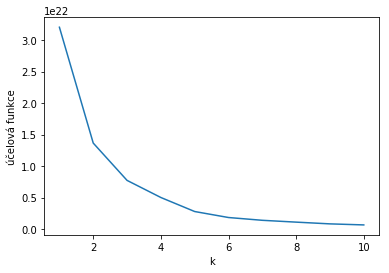

In [29]:
from sklearn.cluster import KMeans
import numpy as np

def elbow_plot(data):
    # Find the best number of clusters
    inertia = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, random_state=420)
        kmeans.fit(data.drop(columns=["id"]))
        inertia.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.plot(range(1,11), inertia)
    plt.xlabel("k")
    plt.ylabel('účelová funkce')
    plt.show()

elbow_plot(df)

In [76]:
# Create a copy of the original dataframe
dfc = df.copy()

# Train the final model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=420)

# Save the cluster id to the dataset
dfc['cluster'] = kmeans.fit_predict(df.drop(columns=["id"]))

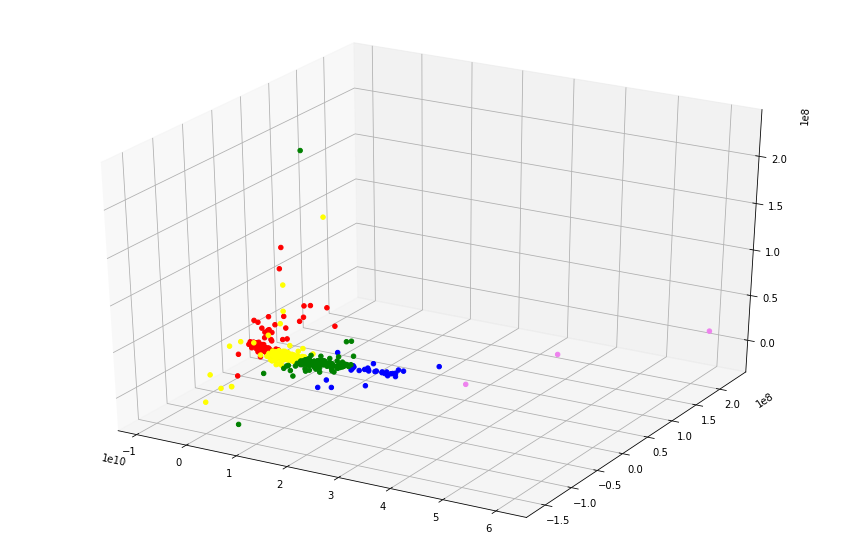

In [77]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(data, colors):
    """ 3D plot of the clusters split by color """
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    for i, v in enumerate(sorted(data["cluster"].unique())):
        ax.scatter(data[data["cluster"] == v].x, 
                   data[data["cluster"] == v].y, 
                   data[data["cluster"] == v].z, 
                   c = colors[i], alpha=1)

# Reduce dimensionality to 3D
_dfc = PCA(n_components=3).fit_transform(dfc.drop(columns=["id", "cluster"]))

# Assign the values to the original DF
dfc["x"] = _dfc[:,0]
dfc["y"] = _dfc[:,1]
dfc["z"] = _dfc[:,2]

# Plot the 3D
plot_3d(dfc, ["red", "green", "blue", "yellow", "violet"])

## Classification (20%)
- Naïve Bayes (2%)
- **Instance-based Learning (3%)**
- Decision Trees (5%)
- Random Forests (5%)
- **XGBoost (5%)**

In [81]:
# Best model results are stored in the results dictionary
results = {}

### GaussianNB - Naïve Bayes (2%)
- Does not work with correlated columns

| description                    | score  |
| ------------------------------ | ------ |
| No preprocessing               | 0.7523 |
| PCA (n=1)                      | 0.7617 |
| SelectKBest (k=28)             | 0.8130 |

#### Original dataset

In [172]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gaus = GaussianNB().fit(X_merge, y_merge)
results["GaussianNB"] = cross_val_score(gaus, X_merge, y_merge, cv=5, verbose=0, n_jobs=8).mean()
print("GaussianNB score: {:0.4f}".format(cross_val_score(gaus, X_merge, y_merge, cv=5, verbose=0, n_jobs=8).mean()))

GaussianNB score: 0.7523


#### Select K best parameters

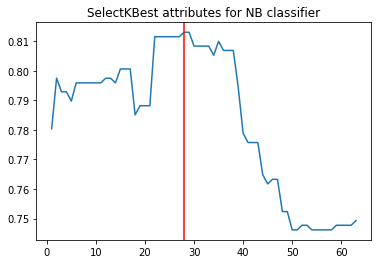

Best value 0.8130 with k=28.


In [183]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

x, y = ([], [])
for i in range(1, 64, 1):
    XX = SelectKBest(f_classif, k=i).fit_transform(X_merge, y_merge)
    g = GaussianNB().fit(XX, y_merge)
    x.append(i)
    y.append(cross_val_score(g, XX, y_merge, cv=5, n_jobs=8).mean())

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("SelectKBest attributes for NB classifier")
ax.axvline(y.index(max(y))+1, c="red")
plt.show()

print("Best value {:0.4f} with k={}.".format(max(y), x[y.index(max(y))]))

#### PCA

In [40]:
from sklearn.decomposition import PCA

x, y = ([], [])
for i in range(1, 24, 1):
    XX = PCA(n_components=i).fit_transform(X_merge)
    g = GaussianNB().fit(XX, y_merge)
    x.append(i)
    y.append(cross_val_score(g, XX, y_merge, cv=5, n_jobs=8).mean())

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("PCA attributes for NB classifier")
ax.axvline(y.index(max(y))+1, c="red")
plt.show()

print("Best value {:0.4f} with k={}.".format(max(y), x[y.index(max(y))]))

NameError: name 'X_merge' is not defined

#### RandomForestClassifier

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.4, min_samples_leaf=12, min_samples_split=3, n_estimators=100)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid = {'max_features' : np.arange(5, 9, 2),
        'n_estimators' : np.arange(30, 120, 30),
        'max_depth': np.arange(6, 13, 1),
        'min_samples_leaf': np.arange(1, 4, 1),
        'min_samples_split': np.arange(0.001, 0.3, 0.1)
       }

randf = GridSearchCV(RandomForestClassifier(), grid, cv=5, verbose=2, n_jobs=8).fit(X_merge, y_merge)
results["RandomForestClassifier"] = randf.best_score_.mean()
print("RandomForestClassifier best score: {} for {}.".format(randf.best_score_.mean(), randf.best_params_))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 426 tasks      | elapsed:   11.6s
[Parallel(n_jobs=8)]: Done 832 tasks      | elapsed:   24.3s
[Parallel(n_jobs=8)]: Done 1350 out of 1350 | elapsed:   40.6s finished


RandomForestClassifier best score: 0.8644859813084113 for {'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 90}.


RandomForestClassifier best score: 0.8535825545171339 for {'max_depth': 6, 'max_features': 9, 'n_estimators': 13}.

#### KNeighborsClassifier
Should normalize???

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)
       }

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=5, verbose=v, n_jobs=8).fit(X_merge, y_merge)
results["KNeighborsClassifier"] = knnclas.best_score_.mean()
print("KNeighborsClassifier best score: {} for {}.".format(knnclas.best_score_, knnclas.best_params_))

KNeighborsClassifier best score: 0.7679127725856698 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 11, 'weights': 'uniform'}.


KNeighborsClassifier best score: 0.7679127725856698 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 11, 'weights': 'uniform'}.

#### DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'criterion': ['gini'],
        'min_samples_split' : np.arange(3, 30, 2),
        'min_samples_leaf' : np.arange(3, 12, 1),
        'max_depth': np.arange(4, 12, 1)
       }

dtc = GridSearchCV(DecisionTreeClassifier(), grid, cv=5, verbose=v, n_jobs=8).fit(X_merge, y_merge)
results["DecisionTreeClassifier"] = dtc.best_score_.mean()
print("DecisionTreeClassifier best score: {} for {}.".format(dtc.best_score_.mean(), dtc.best_params_))

DecisionTreeClassifier best score: 0.8426791277258567 for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}.


DecisionTreeClassifier best score: 0.8442367601246106 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 9}.

#### LogisticRegression
kinda sucks for high dimensional inputs

#### MLPClassifier

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import itertools

grid = {"hidden_layer_sizes": [(3,), (5,), (7,), (6, 6), (7,7), (10, 7, 4), (7, 7, 7), (12, 12, 12), (12, 4, 12, 12), (10, 9, 8)],
        "activation": ["relu"],
        "max_iter": [1000],
       }

mlpercp = GridSearchCV(MLPClassifier(), grid, cv=5, verbose=v, n_jobs=8).fit(X_merge, y_merge)
results["MLPClassifier"] = mlpercp.best_score_.mean()
print("MLPClassifier best score: {} for {}.".format(mlpercp.best_score_.mean(), mlpercp.best_params_))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MLPClassifier best score: 0.7538940809968847 for {'activation': 'relu', 'hidden_layer_sizes': (3,), 'max_iter': 1000}.


MLPClassifier best score: 0.7476635514018691 for {'activation': 'relu', 'hidden_layer_sizes': (10, 7, 4), 'max_iter': 1000}.

#### TPOTClassifier

In [25]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=40, random_state=42, verbosity=2, n_jobs=8, cv=5).fit(X_merge, y_merge)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Generation 1 - Current best internal CV score: 0.8878391472868217
Generation 2 - Current best internal CV score: 0.8878391472868217
Generation 3 - Current best internal CV score: 0.8893653100775193
Generation 4 - Current best internal CV score: 0.8893653100775193
Generation 5 - Current best internal CV score: 0.8893653100775193

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.4, min_samples_leaf=12, min_samples_split=3, n_estimators=100)


Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.4, min_samples_leaf=12, min_samples_split=3, n_estimators=100)

In [28]:
best_cv = 0
best_classifier = None

for key, value in tpot.evaluated_individuals_.items():
    if value["internal_cv_score"] > best_cv:
        best_cv = value["internal_cv_score"]
        best_classifier = (key, value)

# pipeline_optimizer.export('tpot_exported_pipeline.py')
results["TPOTClassifier"] = best_classifier[1]["internal_cv_score"]
print("TPOTClassifier score: {}".format(best_classifier[1]["internal_cv_score"]))

TPOTClassifier score: 0.8893653100775193


## Select the best classifier

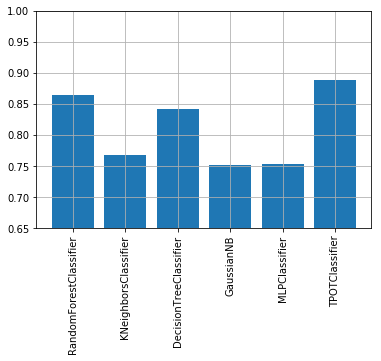

In [42]:
import matplotlib.pyplot as plt

plt.ylim(bottom=0.65, top=1)
plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()), rotation="vertical")
plt.grid()
plt.show()